# Experiment 4

Experiment 4 aims to explore the effect of swarm size on the performance of the swarm in exploring the pipe network. It does this by comparing the percentage of the pipe links explored in 100 turns for each swarm size. The swarm size is varied from 10 to 50 and for each swarm size and each swarm control method, the starting node is the same for each agent and 15 different starting nodes are examined to reduce the effect of the starting node on the results.

In [1]:
import random
random.seed(42)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [3]:
# Relative Path to Network INP File
network_file = "networks/Net3.inp"
# Create the environment
env = Network(network_file)
# Get all the nodes in the network with degree = 1 - these are the possible start nodes
g = env.water_network_model.to_graph().to_undirected()
deg = g.degree
start_pool = [node for node, degree in deg if degree == 1]
print(f"Start Pool: {start_pool}")
print(f"Number of Start Nodes: {len(start_pool)}")
print(f"Number of Nodes: {len(g.nodes)}")
print(f"Number of Links: {len(g.edges)}")

Start Pool: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2', '3']
Number of Start Nodes: 16
Number of Nodes: 97
Number of Links: 119


## Create simulations

### Simulation parameters

- env: the network environment
- num_agents: the number of agents to create (this will vary)
- swarm: whether to use swarm intelligence - all options will be tested
- swarm_config: the configuration of the swarm - all options will be tested
- start_node: the start node of the agents - a random node will be chosen from the start node pool
- max_turns: the maximum number of turns to run the simulation for

In [4]:
start_nodes = start_pool[:15]
number_of_agents = [10, 20, 30, 40, 50]
max_turns = 20

print(f"Start Nodes: {start_nodes}")

Start Nodes: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2']


### Experiment 4.1

- env: the network environment
- num_agents: 10, 20, 30, 40, 50
- swarm: False
- swarm_config: None
- start_node: a random node from the start node pool
- max_turns: 100
- run_until_complete: False
- metric: 'pct_links_explored'
- filepath: notable-results/Experiment4/NoSwarm

In [5]:
simulations_4_1 = []

for agent_num in number_of_agents:
    for start_node in start_nodes:
        print(f"Number of Agents: {agent_num} - Start Node: {start_node}")
        sim = Simulation(env, num_agents=agent_num, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-4/NoSwarm")
        sim.run(max_turns=max_turns)
        simulations_4_1.append((agent_num, start_node, sim.path_to_results_directory))
    
print(f"Done {len(simulations_4_1)} simulations: {simulations_4_1}")

Number of Agents: 10 - Start Node: 15
Number of Agents: 10 - Start Node: 35
Number of Agents: 10 - Start Node: 131
Number of Agents: 10 - Start Node: 166
Number of Agents: 10 - Start Node: 167
Number of Agents: 10 - Start Node: 203
Number of Agents: 10 - Start Node: 219
Number of Agents: 10 - Start Node: 225
Number of Agents: 10 - Start Node: 231
Number of Agents: 10 - Start Node: 243
Number of Agents: 10 - Start Node: 253
Number of Agents: 10 - Start Node: River
Number of Agents: 10 - Start Node: Lake
Number of Agents: 10 - Start Node: 1
Number of Agents: 10 - Start Node: 2
Number of Agents: 20 - Start Node: 15
Number of Agents: 20 - Start Node: 35
Number of Agents: 20 - Start Node: 131
Number of Agents: 20 - Start Node: 166
Number of Agents: 20 - Start Node: 167
Number of Agents: 20 - Start Node: 203
Number of Agents: 20 - Start Node: 219
Number of Agents: 20 - Start Node: 225
Number of Agents: 20 - Start Node: 231
Number of Agents: 20 - Start Node: 243
Number of Agents: 20 - Start N

### Experiment 4.2

- env: the network environment
- num_agents: 10, 20, 30, 40, 50
- swarm: True
- swarm_config: naive
- start_node: a random node from the start node pool
- max_turns: 100
- run_until_complete: False
- metric: 'pct_links_explored'
- filepath: notable-results/Experiment4/NaiveSwarm

In [6]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations_4_2 = []

for agent_num in number_of_agents:
    for start_node in start_nodes:
        print(f"Number of Agents: {agent_num} - Start Node: {start_node}")
        sim = Simulation(env, num_agents=agent_num, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-4/NaiveSwarm")
        sim.run(max_turns=max_turns)
        simulations_4_2.append((agent_num, start_node, sim.path_to_results_directory))
    
print(f"Done {len(simulations_4_2)} simulations: {simulations_4_2}")

Number of Agents: 10 - Start Node: 15
Number of Agents: 10 - Start Node: 35
Number of Agents: 10 - Start Node: 131
Number of Agents: 10 - Start Node: 166
Number of Agents: 10 - Start Node: 167
Number of Agents: 10 - Start Node: 203
Number of Agents: 10 - Start Node: 219
Number of Agents: 10 - Start Node: 225
Number of Agents: 10 - Start Node: 231
Number of Agents: 10 - Start Node: 243
Number of Agents: 10 - Start Node: 253
Number of Agents: 10 - Start Node: River
Number of Agents: 10 - Start Node: Lake
Number of Agents: 10 - Start Node: 1
Number of Agents: 10 - Start Node: 2
Number of Agents: 20 - Start Node: 15
Number of Agents: 20 - Start Node: 35
Number of Agents: 20 - Start Node: 131
Number of Agents: 20 - Start Node: 166
Number of Agents: 20 - Start Node: 167
Number of Agents: 20 - Start Node: 203
Number of Agents: 20 - Start Node: 219
Number of Agents: 20 - Start Node: 225
Number of Agents: 20 - Start Node: 231
Number of Agents: 20 - Start Node: 243
Number of Agents: 20 - Start N

### Experiment 4.3

- env: the network environment
- num_agents: 10, 20, 30, 40, 50
- swarm: True
- swarm_config: informed, mean
- start_node: a random node from the start node pool
- max_turns: 100
- run_until_complete: False
- metric: 'pct_links_explored'
- filepath: notable-results/Experiment4/InformedMeanSwarm

In [7]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations_4_3 = []

for agent_num in number_of_agents:
    for start_node in start_nodes:
        print(f"Number of Agents: {agent_num} - Start Node: {start_node}")
        sim = Simulation(env, num_agents=agent_num, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-4/InformedMeanSwarm")
        sim.run(max_turns=max_turns)
        simulations_4_3.append((agent_num, start_node, sim.path_to_results_directory))
    
print(f"Done {len(simulations_4_3)} simulations: {simulations_4_3}")

Number of Agents: 10 - Start Node: 15
Number of Agents: 10 - Start Node: 35
Number of Agents: 10 - Start Node: 131
Number of Agents: 10 - Start Node: 166
Number of Agents: 10 - Start Node: 167
Number of Agents: 10 - Start Node: 203
Number of Agents: 10 - Start Node: 219
Number of Agents: 10 - Start Node: 225
Number of Agents: 10 - Start Node: 231
Number of Agents: 10 - Start Node: 243
Number of Agents: 10 - Start Node: 253
Number of Agents: 10 - Start Node: River
Number of Agents: 10 - Start Node: Lake
Number of Agents: 10 - Start Node: 1
Number of Agents: 10 - Start Node: 2
Number of Agents: 20 - Start Node: 15
Number of Agents: 20 - Start Node: 35
Number of Agents: 20 - Start Node: 131
Number of Agents: 20 - Start Node: 166
Number of Agents: 20 - Start Node: 167
Number of Agents: 20 - Start Node: 203
Number of Agents: 20 - Start Node: 219
Number of Agents: 20 - Start Node: 225
Number of Agents: 20 - Start Node: 231
Number of Agents: 20 - Start Node: 243
Number of Agents: 20 - Start N

### Experiment 4.4

- env: the network environment
- num_agents: 10, 20, 30, 40, 50
- swarm: True
- swarm_config: informed, median
- start_node: a random node from the start node pool
- max_turns: 100
- run_until_complete: False
- metric: 'pct_links_explored'
- filepath: notable-results/Experiment4/InformedMedianSwarm

In [8]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations_4_4 = []

for agent_num in number_of_agents:
    for start_node in start_nodes:
        print(f"Number of Agents: {agent_num} - Start Node: {start_node}")
        sim = Simulation(env, num_agents=agent_num, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-4/InformedMedianSwarm")
        sim.run(max_turns=max_turns)
        simulations_4_4.append((agent_num, start_node, sim.path_to_results_directory))
    
print(f"Done {len(simulations_4_4)} simulations: {simulations_4_4}")

Number of Agents: 10 - Start Node: 15
Number of Agents: 10 - Start Node: 35
Number of Agents: 10 - Start Node: 131
Number of Agents: 10 - Start Node: 166
Number of Agents: 10 - Start Node: 167
Number of Agents: 10 - Start Node: 203
Number of Agents: 10 - Start Node: 219
Number of Agents: 10 - Start Node: 225
Number of Agents: 10 - Start Node: 231
Number of Agents: 10 - Start Node: 243
Number of Agents: 10 - Start Node: 253
Number of Agents: 10 - Start Node: River
Number of Agents: 10 - Start Node: Lake
Number of Agents: 10 - Start Node: 1
Number of Agents: 10 - Start Node: 2
Number of Agents: 20 - Start Node: 15
Number of Agents: 20 - Start Node: 35
Number of Agents: 20 - Start Node: 131
Number of Agents: 20 - Start Node: 166
Number of Agents: 20 - Start Node: 167
Number of Agents: 20 - Start Node: 203
Number of Agents: 20 - Start Node: 219
Number of Agents: 20 - Start Node: 225
Number of Agents: 20 - Start Node: 231
Number of Agents: 20 - Start Node: 243
Number of Agents: 20 - Start N

## Results

**What do I have?**

csv files with the following columns:
- turn number
- the percentage of nodes explored at that turn
- the percentage of links explored at that turn
- the node novelty at that turn
- the link novelty at that turn

**What do I want?**

Number of agents on the x-axis and the percentage of links explored on the y-axis?

Number of agents on the x-axis and the percentage of nodes explored on the y-axis?

Number of agents on the x-axis and the number of turns to explore 100% of the links on the y-axis?

In [9]:
def read_results(simulations):
    results = []
    for sim in simulations:
        num_agents, start_node, path = sim
        df = pd.read_csv(f"{path}/results.csv")
        df['num_agents'] = num_agents
        df['start_node'] = start_node
        df.num_agents = num_agents
        df.start_node = start_node
        
        results.append(df)
    return results

def sanitise_results(results):
    # Group the results into groups with the same number of agents
    results = pd.concat(results)
    results = results.groupby(['num_agents', 'start_node']).agg({'pct_links_explored': 'max'})
    results = results.reset_index()
    
    # Get the mean and standard deviation for each number of agents
    results = results.groupby('num_agents').agg({'pct_links_explored': ['mean', 'std', 'min', 'max']})
    results = results.reset_index()
    results.columns = ['num_agents', 'mean_pct_links_explored', 'std', 'min', 'max']
    
    return results

def get_results(simulations):
    results = read_results(simulations)
    results = sanitise_results(results)
    return results


In [10]:
results_3_1 = get_results(simulations_4_1)
results_3_2 = get_results(simulations_4_2)
results_3_3 = get_results(simulations_4_3)
results_3_4 = get_results(simulations_4_4)


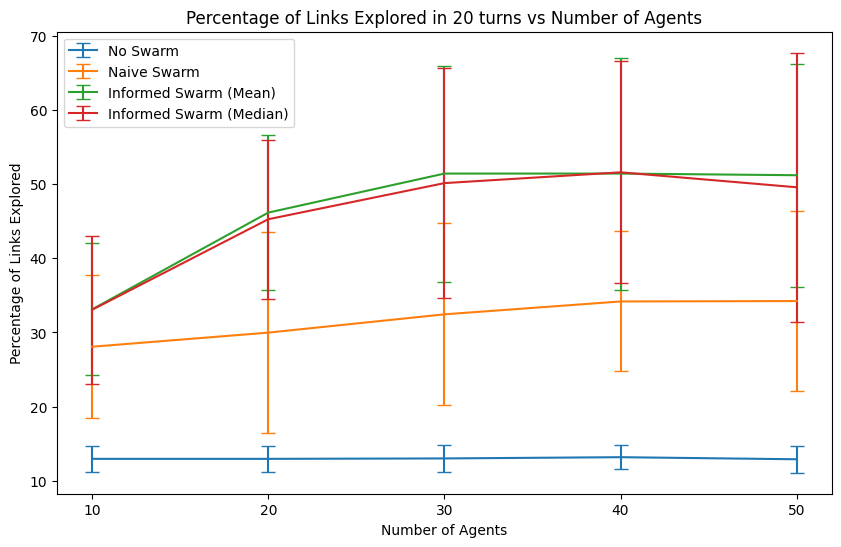

In [11]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(results_3_1['num_agents'], results_3_1['mean_pct_links_explored'], yerr=results_3_1['std'], label="No Swarm", capsize=5)
ax.errorbar(results_3_2['num_agents'], results_3_2['mean_pct_links_explored'], yerr=results_3_2['std'], label="Naive Swarm", capsize=5)
ax.errorbar(results_3_3['num_agents'], results_3_3['mean_pct_links_explored'], yerr=results_3_3['std'], label="Informed Swarm (Mean)", capsize=5)
ax.errorbar(results_3_4['num_agents'], results_3_4['mean_pct_links_explored'], yerr=results_3_4['std'], label="Informed Swarm (Median)", capsize=5)

ax.set_xticks(number_of_agents)

ax.set_xlabel("Number of Agents")
ax.set_ylabel("Percentage of Links Explored")
ax.set_title(f"Percentage of Links Explored in {max_turns} turns vs Number of Agents")
ax.legend()

plt.show()

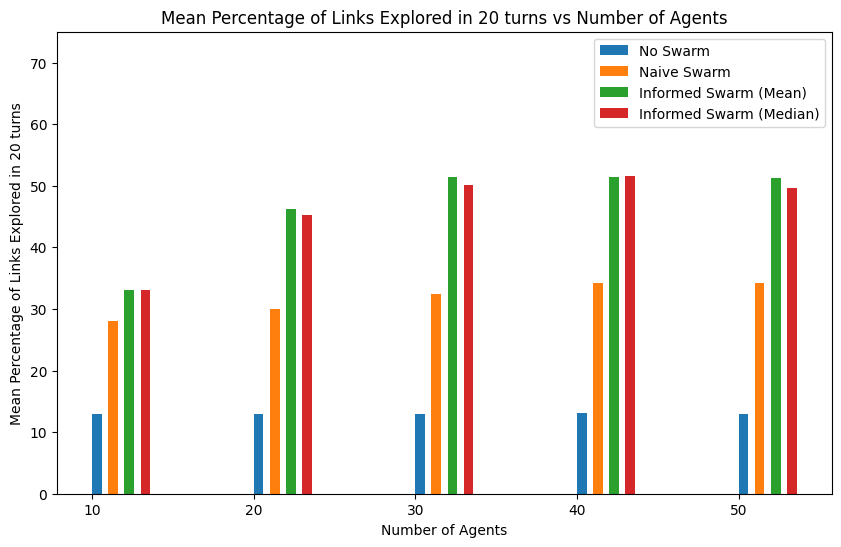

In [42]:
# Replot the above graph but as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

OFFSET = 0.6

ax.bar(results_3_1['num_agents'], results_3_1['mean_pct_links_explored'], width=OFFSET, label="No Swarm", align='edge')
ax.bar(results_3_2['num_agents'] + 1, results_3_2['mean_pct_links_explored'], width=OFFSET, label="Naive Swarm", align='edge')
ax.bar(results_3_3['num_agents'] + 2, results_3_3['mean_pct_links_explored'], width=OFFSET, label="Informed Swarm (Mean)", align='edge')
ax.bar(results_3_4['num_agents'] + 3, results_3_4['mean_pct_links_explored'], width=OFFSET, label="Informed Swarm (Median)", align='edge')

ax.set_xticks(number_of_agents)
ax.set_ylim(0, 75)

ax.set_xlabel("Number of Agents")
ax.set_ylabel(f"Mean Percentage of Links Explored in {max_turns} turns")
ax.set_title(f"Mean Percentage of Links Explored in {max_turns} turns vs Number of Agents")
ax.legend()

plt.show()

In [12]:
# from copy import deepcopy

# def sanitise_results(dataframe, start_node, agent_num):
#     df: pd.DataFrame = deepcopy(dataframe)
#     temp = pd.DataFrame()
    
#     # Get the number of turns taken to achieve 100% exploration or the max turns
#     df.loc[df["pct_links_explored"] == 100, "turns_to_complete"] = df["turns"]
    
# def get_simulation_results(simulation_results):
#     results = []
#     for sim in simulation_results:
#         agent_num, start_node, path = sim
#         sim_results = pd.read_csv(f"{path}/results.csv")
        
    
    

In [13]:

# results = pd.DataFrame()

# # Create a dataframe containing the results of all the simulations
# # The dataframe will have the number of agents as the columns and the swarm type
# # as the index and the data will be the turns required to fully explore the network
# # for each swarm type and number of agents combination

# # Create the dataframes
# df_3_1 = pd.DataFrame()
# for number_of_agents, path in simulations_3_1:
#     temp = pd.read_csv(path + "/results.csv")
#     temp = temp[['turn', 'pct_links_explored']]
#     temp = temp.max()
#     df_3_1[number_of_agents] = temp
    
# df_3_2 = pd.DataFrame()
# for number_of_agents, path in simulations_3_2:
#     temp = pd.read_csv(path + "/results.csv")
#     temp = temp[['turn', 'pct_links_explored']]
#     temp = temp.max()
#     df_3_2[number_of_agents] = temp
    
# df_3_3 = pd.DataFrame()
# for number_of_agents, path in simulations_3_3:
#     temp = pd.read_csv(path + "/results.csv")
#     temp = temp[['turn', 'pct_links_explored']]
#     temp = temp.max()
#     df_3_3[number_of_agents] = temp

# df_3_4 = pd.DataFrame()
# for number_of_agents, path in simulations_3_4:
#     temp = pd.read_csv(path + "/results.csv")
#     temp = temp[['turn', 'pct_links_explored']]
#     temp = temp.max()
#     df_3_4[number_of_agents] = temp

In [14]:
# # Create the dataframe with the swarm type as the index and the number of agents as the columns
# swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
# experiment_dataframes = [df_3_1, df_3_2, df_3_3, df_3_4]
# number_of_agents = [10, 20, 30, 40, 50]

# results = pd.DataFrame()
# results.index.name = 'Swarm Type'
# results.columns.name = 'Number of Agents'

# for num in number_of_agents:
#     for swarm_type in swarm_types:
#         results.loc[swarm_type, num] = experiment_dataframes[swarm_types.index(swarm_type)][num][0]
    
# results

In [15]:
# # Plot the results
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
# fig.subplots_adjust(hspace=0.05)

# ax1.plot(results.columns, results.loc['no-swarm'], label='No Swarm')
# ax2.plot(results.columns, results.loc['naive'], label='Naive')
# ax2.plot(results.columns, results.loc['informed-mean'], label='Informed Mean', linestyle='-')
# ax2.plot(results.columns, results.loc['informed-median'], label='Informed Median', linestyle='--')

# ax1.set_ylim(990, 1000)
# ax2.set_ylim(40, 150)

# ax1.spines.bottom.set_visible(False)
# ax2.spines.top.set_visible(False)
# ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .5
# kwargs = dict(marker=[(-1, -d), (1, d)], markersize=9,
#               linestyle="none", color='k', mec='k', mew=1, clip_on=False)
# ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
# ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# plt.show()